In [1]:
!unzip /content/drive/MyDrive/sentiment_data.zip

Archive:  /content/drive/MyDrive/sentiment_data.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [2]:
import pandas as pd
import numpy as np
import re, string, time

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [156]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df_test = pd.read_csv('/content/testdata.manual.2009.06.14.csv', encoding='latin-1', header=None)

In [157]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [158]:
df_test.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [159]:
df_test[0].unique() # sentiment

array([4, 0, 2])

In [160]:
len(df_unknown[1].unique())

498

In [161]:
df = df.drop([1,2,3,4], axis=1)
df_test = df_test.drop([1,2,3,4], axis=1)

In [162]:
df.columns = ['sentiment', 'text']
df_test.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [163]:
lab_to_sentiment = {0:"Negative", 4:"Positive", 2:"Neutral"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df_test.sentiment = df_test.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Here are decoding the labels. We map **0 -> Negative and 1 -> Positive** as directed by the datset desciption. Now that we decoded we shall now analyse the dataset by its distribution. Because it's important that we have almost small amount of examples for given classes.

Text(0.5, 1.0, 'Sentiment Data Distribution')

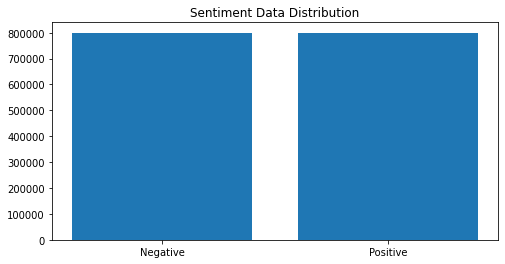

In [9]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

Text(0.5, 1.0, 'Sentiment Data Distribution')

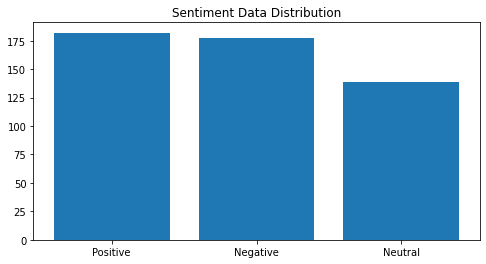

In [164]:
val_count = df_test.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [10]:
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"haha", " haha", text)
    return text 

In [11]:
exclude = set(string.punctuation) # Set of all special characters
remove_digits = str.maketrans('', '', string.digits) # Set of all digits

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

def preprocess_text(text, stem=False):
    text = text.lower() # lower casing
    text = re.sub("'", '', text) # remove the quotation marks if any
    text = ''.join(ch for ch in text if ch not in exclude)
    text = text.translate(remove_digits) # remove the digits
    text = re.sub(" +", " ", text) # remove extra spaces
    text = re.sub(r'(\s)@\w+', r'\1', text) # removes names that refer with @
    text = decontraction(text)
    text = re.sub(r'[^\x00-\x7F]',' ', text)
    text = ' '.join( [w for w in text.split() if len(w)>1] )
    text = text.strip()
    tokens = []
    for token in text.split():
      if token not in stop_words:
        if stem:
          tokens.append(stemmer.stem(token))
        else:
          tokens.append(token)
    return " ".join(tokens)

In [12]:
df.text = df.text.apply(lambda x: preprocess_text(x))

In [166]:
df_test.text = df_test.text.apply(lambda x: preprocess_text(x))

**Aaww.. It is clean and tidy now. Now let's see some word cloud visualizations of it.**

### Positive Words

In [13]:
df.head(20)

,sentiment,text
0,Negative,switchfoot httptwitpiccomyzl awww thats bummer...
1,Negative,upset cant update facebook texting might cry r...
2,Negative,kenichan dived many times ball managed save re...
3,Negative,whole body feels itchy like fire
4,Negative,nationwideclass behaving im mad cant see
5,Negative,kwesidei whole crew
6,Negative,need hug
7,Negative,loltrish hey long time see yes rains bit bit l...
8,Negative,tatianak nope didnt
9,Negative,twittera que muera


In [14]:
for i in df.text:
  if len(i.split(' '))>30:
    print(i)


im blue da ba dee da ba di da ba dee da ba di da ba dee da ba di da ba dee da ba di da ba dee da ba di orginal good one


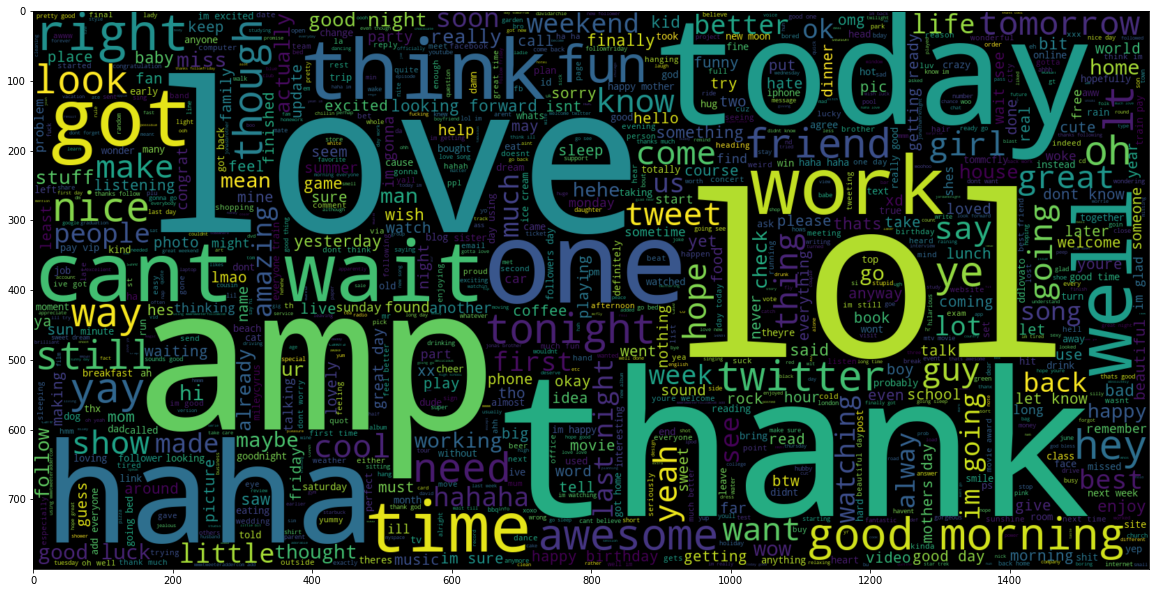

In [15]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

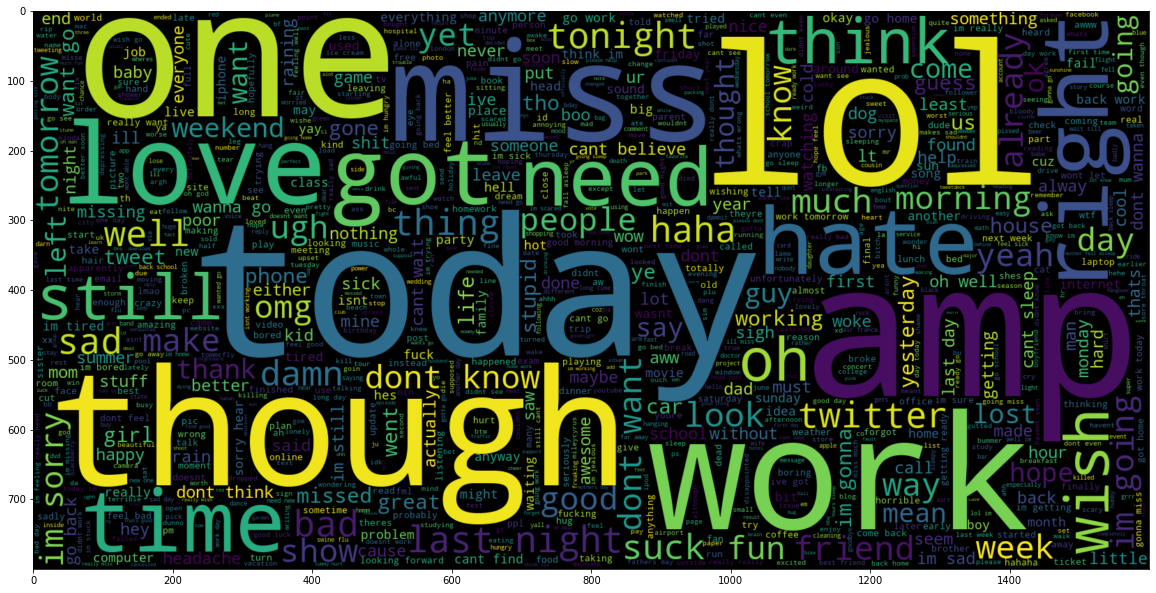

In [16]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [72]:
# find the max length of a sentence in the tweets
max_length = max([len(line.split(' ')) for line in df.text.to_list()])

def tokenize(text):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=40000,
      filters='')
  tokenizer.fit_on_texts(text)
  # tensor = tokenizer.sequences_to_matrix(tokenizer.texts_to_sequences(text).to_list(), mode='tfidf')
  tensor = tokenizer.texts_to_sequences(text)

  return tensor, tokenizer


def text_to_sequence(text, num_examples=None):
  # creating cleaned input, output pairs
  input_tensor, inp_tokenizer = tokenize(text)
  print(input_tensor)

  
  # Padding the input and output tensor to the maximum length
  input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                maxlen=max_length,
                                                                padding='post')
  
  word_index = inp_tokenizer.word_index
  return input_tensor, inp_tokenizer, word_index

In [79]:
labels = df.sentiment.unique().tolist()
labels

['Negative', 'Positive']

### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [19]:
def target_data(sentiment):
  encoder = LabelEncoder()
  encoder.fit(sentiment.to_list())

  label_data = encoder.transform(sentiment).reshape(-1,1)
  print("label_data shape:", label_data.shape)
  return label_data

In [20]:
input_tensor, inp_tokenizer, word_index= text_to_sequence(df.text)
print(word_index)
vocab_size = len(word_index)+1
print(vocab_size)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Train and Test Split

In [22]:
# Creating training and validation sets using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(input_tensor, target_data(df.sentiment), test_size=0.2, random_state = 143)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

label_data shape: (1600000, 1)


((1280000, 35), (320000, 35), (1280000, 1), (320000, 1))

# Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it. 

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.


In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

## Using Glove Vectors

In [23]:
def loading_embeddings():
    ''' loading glove embeddings '''
    embeddings_index = {}
    glove_file = open('/content/drive/MyDrive/glove.6B.100d.txt', encoding="utf8")
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    glove_file.close()
    return embeddings_index

print('Found %s word vectors.' %len(loading_embeddings()))

Found 400000 word vectors.


In [24]:
MAX_NB_WORDS = 50000
def prepare_embedding_matrix(word_index, EMBEDDING_DIM = 100):
    ''' preparing embedding matrix with our data set '''
    embeddings_index = loading_embeddings()
    num_words = min(MAX_NB_WORDS, len(word_index))
    embedding_matrix = np.zeros((num_words + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        if i >= MAX_NB_WORDS:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix, num_words+1

In [25]:
embedding_matrix, emb_vocab_size = prepare_embedding_matrix(word_index)

In [26]:
len(word_index)

788331

In [27]:
emb_vocab_size

50001

In [28]:
EMBEDDING_DIM = 100
LR = 1e-3
BATCH_SIZE = 512

In [30]:
embedding_matrix.shape

(50001, 100)

In [31]:
embedding_layer = tf.keras.layers.Embedding(emb_vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_length,
                                          trainable=False)

# Model Training - LSTM
While developing a DL model, we should keep in mind key things like Model Architecture, Hyperparameter Tuning, and Performance of the model. As you can see in the word cloud, some words are predominantly featured in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc. That's why we use Sequence Models.
### Sequence Model

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction. 

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors. 

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [32]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

## Model 1

In [41]:
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding (Embedding)       (None, 35, 100)           5000100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 35, 100)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 31, 64)            32064     
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 512)               66048 

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

In [44]:
X_train.shape

(1280000, 35)

In [45]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=4, 
                    validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/4
1250/1250 [==============================] - 177s 132ms/step - loss: 0.5456 - accuracy: 0.7198 - val_loss: 0.4939 - val_accuracy: 0.7579 - lr: 0.0010
Epoch 2/4
1250/1250 [==============================] - 168s 134ms/step - loss: 0.5079 - accuracy: 0.7487 - val_loss: 0.4807 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 3/4
1250/1250 [==============================] - 165s 132ms/step - loss: 0.4968 - accuracy: 0.7564 - val_loss: 0.4727 - val_accuracy: 0.7728 - lr: 0.0010
Epoch 4/4
1250/1250 [==============================] - 163s 130ms/step - loss: 0.4904 - accuracy: 0.7608 - val_loss: 0.4690 - val_accuracy: 0.7756 - lr: 0.0010


## Model2

In [33]:
model2 = tf.keras.Sequential([
     # embedding layer
     embedding_layer,
     # bidirectional LSTM layers
     Bidirectional(LSTM(64, 
                        dropout=0.5, 
                        recurrent_dropout=0.5, 
                        return_sequences=True)),
     Bidirectional(LSTM(32, 
                        dropout=0.5, 
                        recurrent_dropout=0.5, 
                        return_sequences=True)),
     Bidirectional(LSTM(16, 
                        dropout=0.5, 
                        recurrent_dropout=0.5)),
     # Classification head
     Dense(64, activation='relu', kernel_regularizer='l2'),
     Dense(16, activation='relu', kernel_regularizer='l2'),
     Dense(4, activation='relu', kernel_regularizer='l2'),
     Dropout(0.5),
     Dense(1, activation='sigmoid')    
 ]) 

In [34]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 100)           5000100   
                                                                 
 bidirectional (Bidirectiona  (None, 35, 128)          84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 35, 64)           41216     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                        

In [37]:
model2.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [39]:
history2 = model2.fit(X_train, y_train, batch_size=1024, epochs=3, 
                    validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/3
1250/1250 [==============================] - 498s 392ms/step - loss: 0.6814 - accuracy: 0.6520 - val_loss: 0.5504 - val_accuracy: 0.7529 - lr: 0.0010
Epoch 2/3
1250/1250 [==============================] - 479s 383ms/step - loss: 0.6037 - accuracy: 0.6786 - val_loss: 0.5288 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 3/3
1250/1250 [==============================] - 476s 381ms/step - loss: 0.5929 - accuracy: 0.6860 - val_loss: 0.5219 - val_accuracy: 0.7675 - lr: 0.0010


In [40]:
X_train.shape

(1280000, 35)

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

In [46]:
# https://stackoverflow.com/questions/45597092/expanded-legend-over-2-subplots
# how to get a gap between two matplotlib plots which are using legends

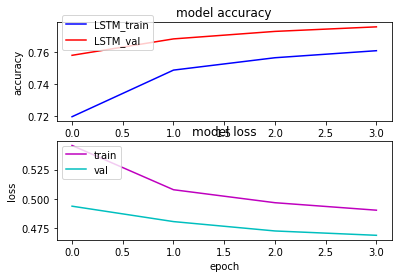

In [47]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], bbox_to_anchor=(0., 1.02, 2.2, .102), loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [48]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(X_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 3s 68ms/step


In [75]:
def predict(text):
    text = preprocess_text(text)
    print(text)
    start_at = time.time()
    # Tokenize text
    test_tensor, test_tokenizer, word_index= text_to_sequence(text)

    # x_test = text_to_sequence(text, num_examples=None)
    # print(x_test)
    # x_test = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_length)
    # Predict
    score = model.predict(test_tensor)[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at} 

In [76]:
print(predict("I love the music"))

love music
[[1], [2], [3], [4], [], [5], [6], [7], [8], [9]]
{'label': 'Positive', 'score': 0.5300209522247314, 'elapsed_time': 0.07118868827819824}


### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [80]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [93]:
y_test = y_test.tolist()
y_test_or = []
for i in y_test:
  if i==1:
    y_test_or.append('Positive')
  else:
    y_test_or.append('Negative')

### Classification Scores

In [97]:
print(classification_report(list(y_test_or), y_pred_1d))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       1.00      0.47      0.64    320000
    Positive       0.00      0.00      0.00         0

    accuracy                           0.47    320000
   macro avg       0.50      0.24      0.32    320000
weighted avg       1.00      0.47      0.64    320000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2

## tfidf

In [99]:
from numpy import array
from numpy import asarray
from numpy import zeros


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=50001)
bag_of_words = vectorizer.fit_transform(df.text)

In [118]:
print("Sparsity of bag_of_words:",
      len(bag_of_words.data)/(bag_of_words.shape[0]*bag_of_words.shape[1])*100)

Sparsity of bag_of_words: 0.013462382002359954


In [119]:
list(vectorizer.vocabulary_.keys())

['switchfoot',
 'awww',
 'thats',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 'upset',
 'cant',
 'update',
 'facebook',
 'texting',
 'might',
 'cry',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'kenichan',
 'many',
 'times',
 'ball',
 'managed',
 'save',
 'rest',
 'go',
 'bounds',
 'whole',
 'body',
 'feels',
 'itchy',
 'like',
 'fire',
 'nationwideclass',
 'behaving',
 'im',
 'mad',
 'see',
 'crew',
 'need',
 'hug',
 'hey',
 'long',
 'time',
 'yes',
 'rains',
 'bit',
 'lol',
 'fine',
 'thanks',
 'hows',
 'nope',
 'didnt',
 'twittera',
 'que',
 'spring',
 'break',
 'plain',
 'city',
 'snowing',
 'repierced',
 'ears',
 'couldnt',
 'bear',
 'watch',
 'thought',
 'ua',
 'loss',
 'embarrassing',
 'counts',
 'idk',
 'either',
 'never',
 'talk',
 'anymore',
 'wouldve',
 'first',
 'gun',
 'really',
 'though',
 'zac',
 'wish',
 'miss',
 'premiere',
 'death',
 'scene',
 'hurt',
 'severely',
 'film',
 'wry',
 'directors',
 'cut',
 'file',
 'taxes',
 'ahh',
 'ive',

In [120]:
len(list(vectorizer.vocabulary_.keys()))

50001

In [121]:
print(bag_of_words.shape, len(vectorizer.vocabulary_))

(1600000, 50001) 50001


In [122]:
embedding_matrix.shape

(50001, 100)

In [124]:
########### (1600000, 50001) . (50001, 100) -> (1600000, 100)
doc_embeds = bag_of_words.dot(embedding_matrix)

In [125]:
doc_embeds.shape

(1600000, 100)

In [126]:
X_train_de, X_test_de, y_train_de, y_test_de = train_test_split(doc_embeds, df.sentiment, test_size=0.20, random_state=42)

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve

In [128]:
NB = GaussianNB()

In [129]:
NB.fit(X_train_de,y_train_de)

GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


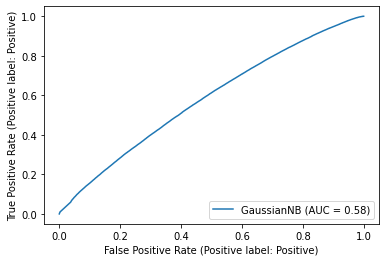

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
disp = plot_roc_curve(NB,X_test_de,y_test_de)

In [132]:
y_pred = NB.predict(X_test_de)

In [133]:
print(classification_report(y_test_de, y_pred))

              precision    recall  f1-score   support

    Negative       0.56      0.53      0.54    159494
    Positive       0.55      0.58      0.57    160506

    accuracy                           0.56    320000
   macro avg       0.56      0.56      0.56    320000
weighted avg       0.56      0.56      0.56    320000



Pardon I acctually forgot about test_data file and run deep learning models without using it but I used for naive_bayes algorithm 

In [170]:
X_test_or = vectorizer.transform(df_test.text).dot(embedding_matrix)

y_pred_or = NB.predict(X_test_or)

In [171]:
print(classification_report(df_test.sentiment, y_pred_or))

              precision    recall  f1-score   support

    Negative       0.43      0.60      0.50       177
     Neutral       0.00      0.00      0.00       139
    Positive       0.43      0.59      0.50       182

    accuracy                           0.43       498
   macro avg       0.29      0.40      0.33       498
weighted avg       0.31      0.43      0.36       498



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
def test(text): # allows single sentence
  return vectorizer.transform([preprocess_text(text)]).dot(embedding_matrix)

In [142]:
NB.predict(test('Love this app simply awesome'))

array(['Positive'], dtype='<U8')